# Report

## by Danil Kireev and Anastasiya Alekseeva

In [1]:
%pip install pandas seaborn matplotlib scikit-learn numpy scipy

Note: you may need to restart the kernel to use updated packages.


## 1. Correlation Coefficient

1. Find two features in your dataset with more or less “linear-like” scatterplot.
2. Display the scatter-plot and comment how well it is suitable for building a linear regression.
3. Build a linear regression of one of the features over the other. Make a comment on the meaning of the slope.
4. Find the correlation and determinacy coefficients, and comment on the meaning of the latter.
5. Make a prediction of the target values for given two or three predictor’ values; make a comment.
6. Compare the mean relative absolute error of the regression on all points of your set according to DA and ML views 
7. Compare the errors and the determinacy coefficient; make a comment.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr

In [3]:
# load dataset and 
df = pd.read_csv("./data/horse.csv")
# remove duplicates as we want to predict from the beginning
df = df.drop_duplicates("hospital_number")
# `drop` unused columns
df = df.drop(
    columns=[
        "hospital_number",
        
        # don't wont to work with shit
        "rectal_temp",
        "rectal_exam_feces",
        "abdomen",
        "abdomo_appearance",
        "peristalsis",
        
        # values are subjective
        "temp_of_extremities",
        "peripheral_pulse",
        "mucous_membrane",
        "pain",
        
        # too many nans
        "nasogastric_tube",
        "nasogastric_reflux",
        "nasogastric_reflux_ph",
        "abdomo_protein",
        
        # useless
        "cp_data",
        
        # interesting, but too complex
        "surgical_lesion",
        "lesion_1",
        "lesion_2",
        "lesion_3",
    ]
)
# remove empty
df = df.dropna()

# stats
print(f"rows: {len(df.dropna())}, features: {len(df.columns)-1}+1")

# convert labels to ints
# store resulting encoders in dict for possible future use
le = {}

for column in df.columns:
    if df[column].dtypes == "object":
        # loops through all columns and converts it if it's not a number
        le[column] = LabelEncoder()
        df[column] = le[column].fit_transform(df[column])

df = df.reset_index()
df

rows: 165, features: 8+1


,index,surgery,age,pulse,respiratory_rate,capillary_refill_time,abdominal_distention,packed_cell_volume,total_protein,outcome
0,0,0,0,66.0,28.0,2,2,45.0,8.4,0
1,1,1,0,88.0,20.0,1,3,50.0,85.0,1
2,2,0,0,40.0,24.0,1,1,33.0,6.7,2
3,3,1,1,164.0,84.0,2,2,48.0,7.2,0
4,6,1,0,48.0,16.0,1,0,37.0,7.0,2
...,...,...,...,...,...,...,...,...,...,...
160,288,1,0,50.0,36.0,1,3,39.0,6.6,2
161,291,1,0,66.0,20.0,1,0,35.0,6.9,0
162,293,0,0,40.0,16.0,1,1,37.0,67.0,2
163,296,1,0,72.0,30.0,1,0,60.0,6.8,0


In [4]:
df.describe()

,index,surgery,age,pulse,respiratory_rate,capillary_refill_time,abdominal_distention,packed_cell_volume,total_protein,outcome
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,150.612121,0.587879,0.078788,71.533333,30.678788,1.248485,1.406061,45.496970,23.525455,1.381818
std,86.084161,0.493715,0.270228,28.035155,17.632076,0.447296,1.173368,10.100335,27.296946,0.844442
min,0.000000,0.000000,0.000000,36.000000,8.000000,0.000000,0.000000,23.000000,3.300000,0.000000
25%,82.000000,0.000000,0.000000,50.000000,18.000000,1.000000,0.000000,38.000000,6.500000,1.000000
50%,153.000000,1.000000,0.000000,64.000000,28.000000,1.000000,1.000000,44.000000,7.400000,2.000000
75%,222.000000,1.000000,0.000000,88.000000,36.000000,2.000000,3.000000,50.000000,56.000000,2.000000
max,297.000000,1.000000,1.000000,184.000000,90.000000,2.000000,3.000000,75.000000,89.000000,2.000000


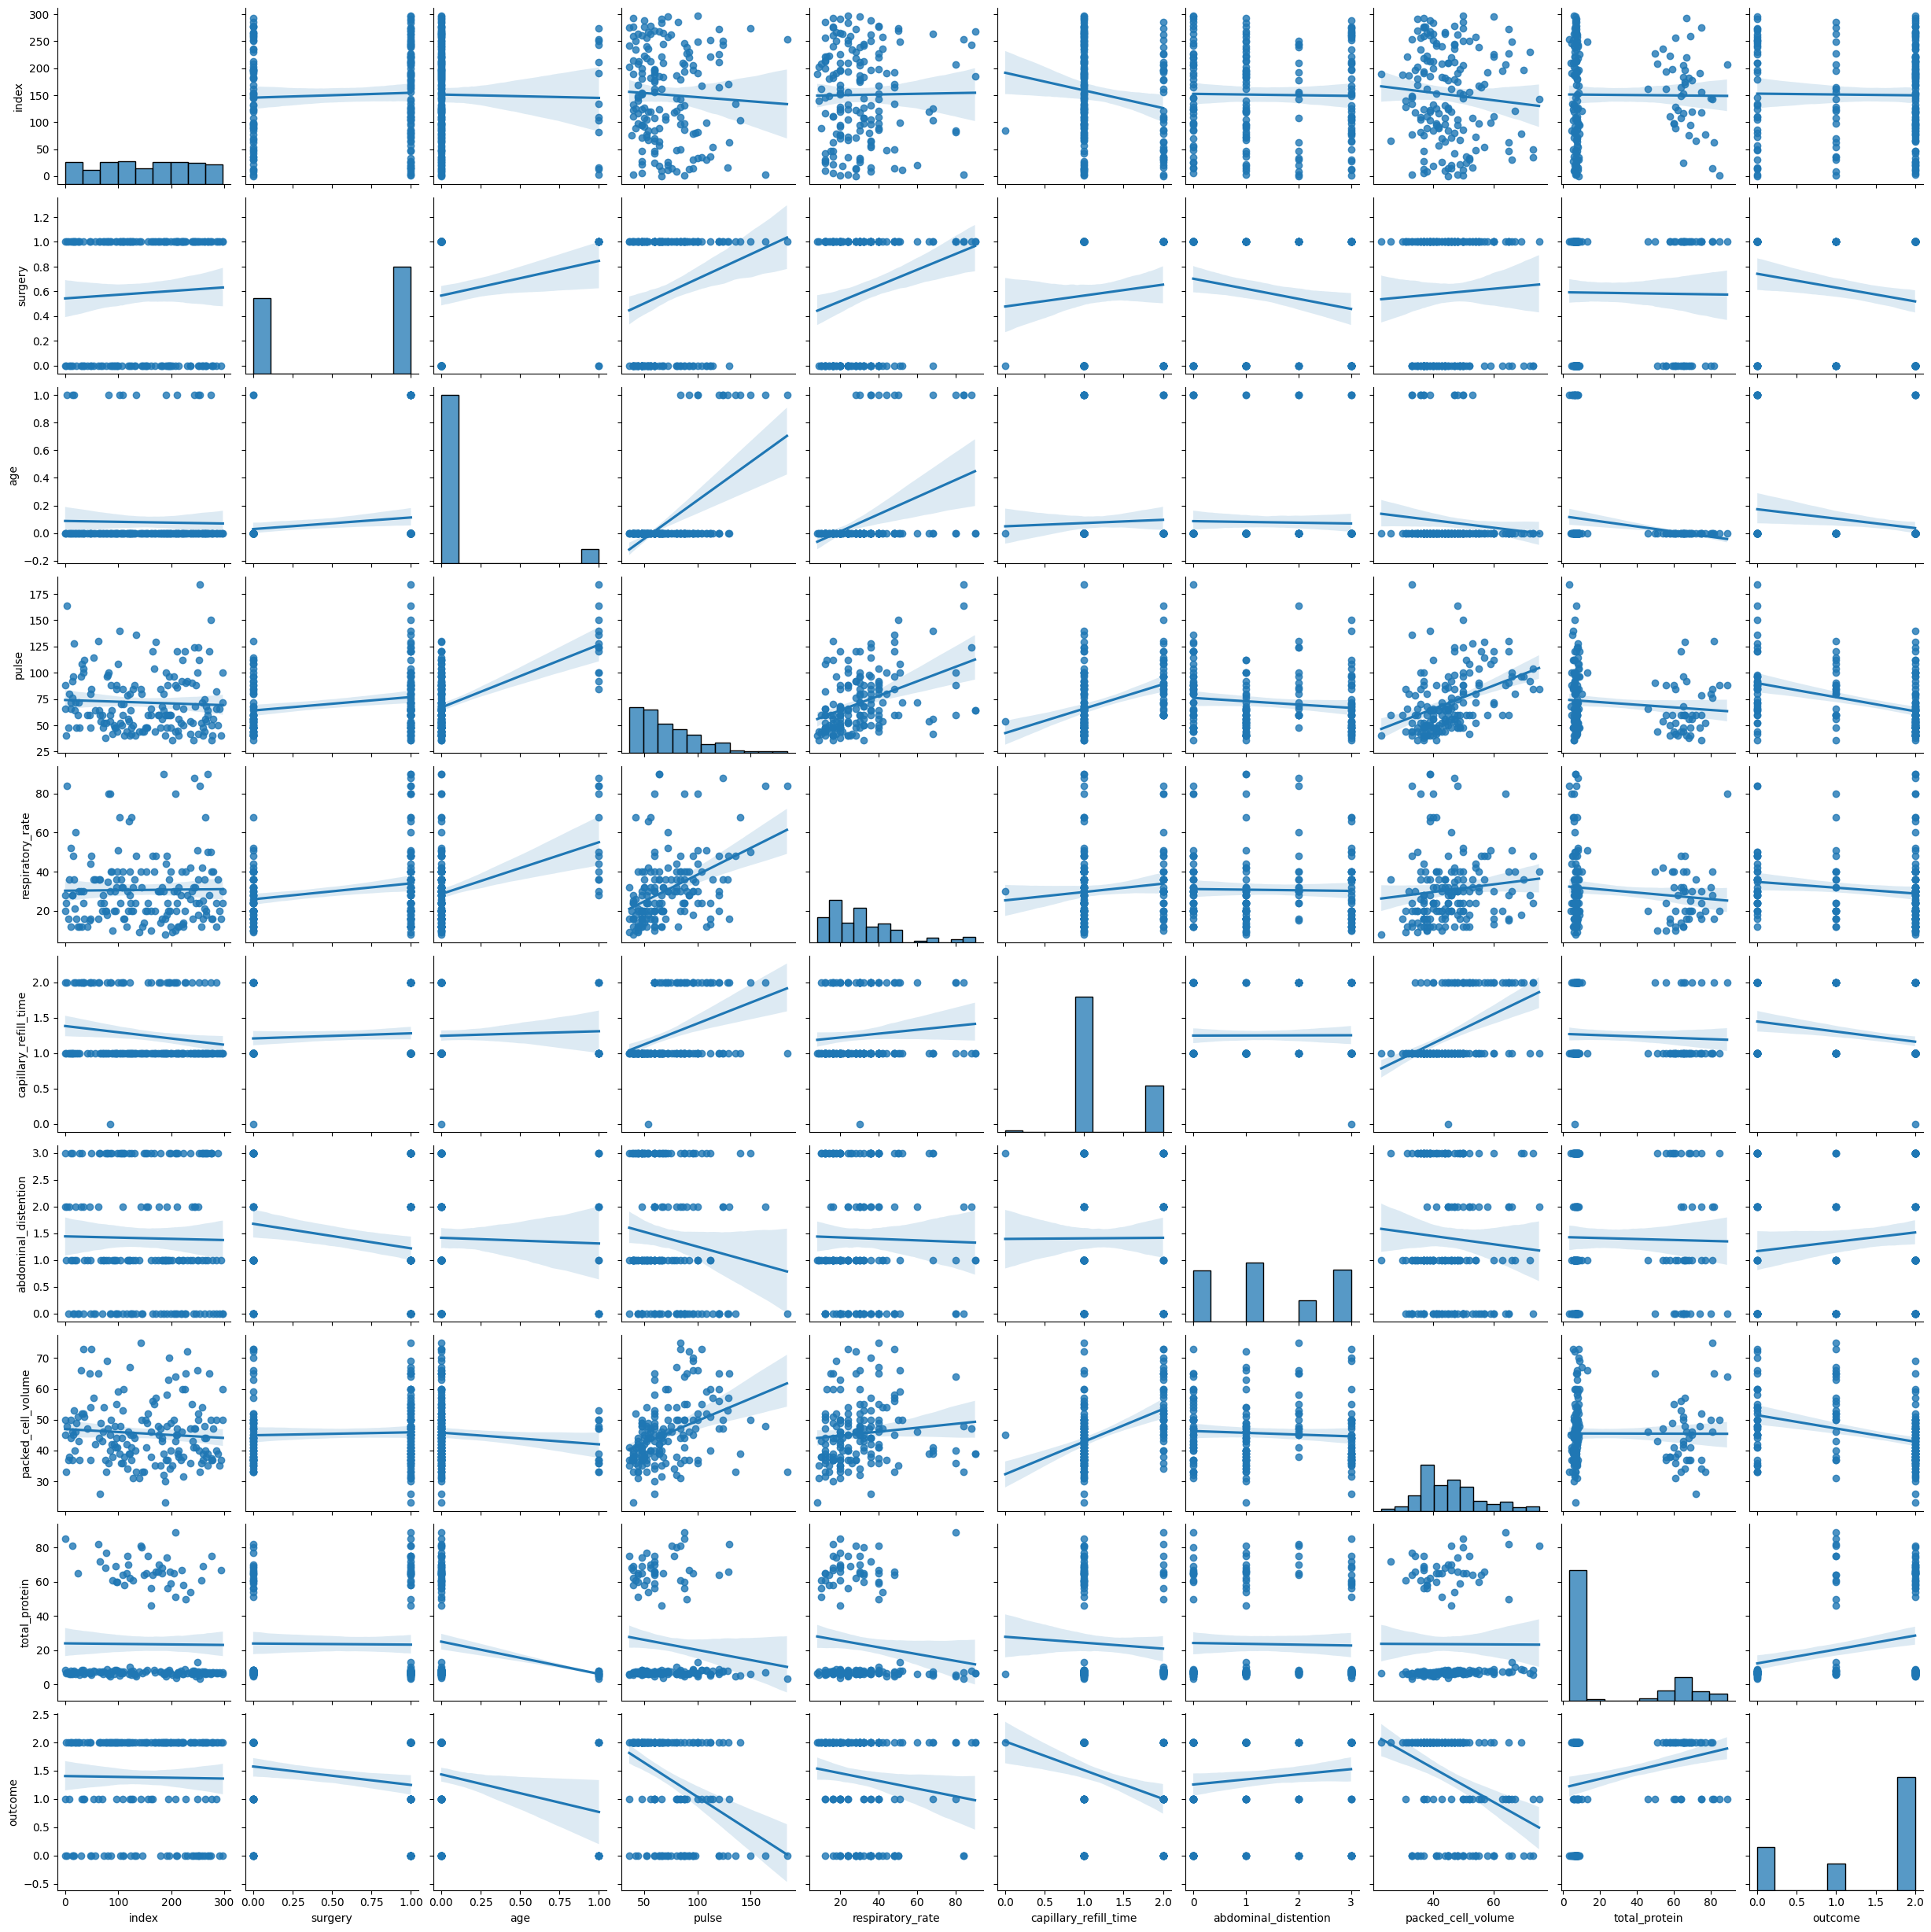

In [5]:
sns.pairplot(df, kind="reg")
plt.show()

chosen pair: ('respiratory_rate', 'pulse')


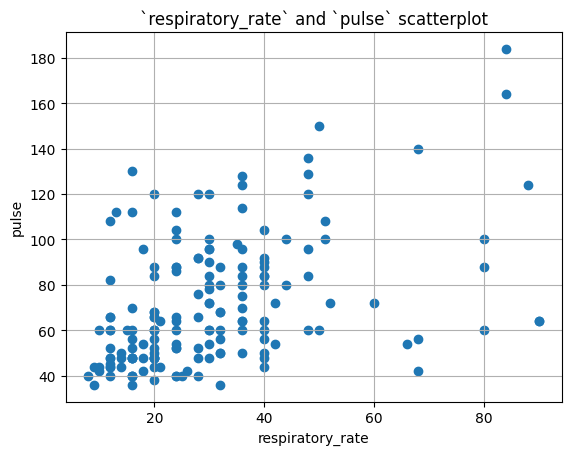

In [6]:
chosen_pair = ("respiratory_rate", "pulse")
print(f"chosen pair: {chosen_pair}")

plt.scatter(df[chosen_pair[0]], df[chosen_pair[1]])

plt.title(f"`{chosen_pair[0]}` and `{chosen_pair[1]}` scatterplot")
plt.xlabel(chosen_pair[0])
plt.ylabel(chosen_pair[1])
plt.grid()

plt.show()

regression forula: `y = 0.6909403251232722 * x + 50.33612166197573`


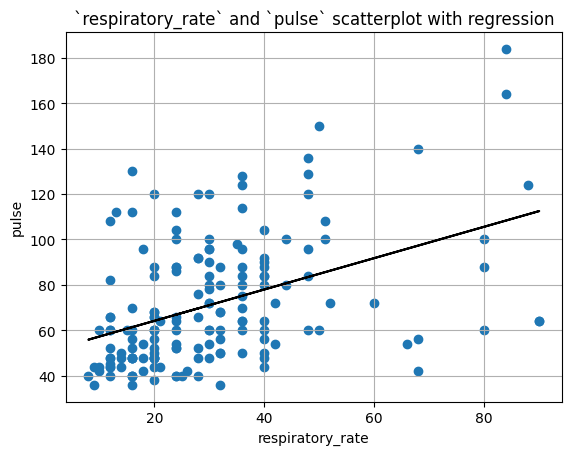

In [7]:
x = df[chosen_pair[0]].to_numpy("int")
X = x.reshape(-1, 1)
y = df[chosen_pair[1]].to_numpy("int")

reg = LinearRegression()
reg.fit(X, y)
print(f'regression forula: `y = {reg.coef_[0]} * x + {reg.intercept_}`')
# print("slope:", reg.coef_[0], "intercept: %.3f" % reg.intercept_)

y_pred = reg.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, color="black")

plt.title(f"`{chosen_pair[0]}` and `{chosen_pair[1]}` scatterplot with regression")
plt.xlabel(chosen_pair[0])
plt.ylabel(chosen_pair[1])
plt.grid()

plt.show()

In [8]:
corr = pearsonr(x, y).statistic
deter = np.square(corr)
print(f"correlation coefficient: {corr}")
print(f"determinacy coefficient: {deter}")

correlation coefficient: 0.4345512677083994
determinacy coefficient: 0.18883480426697702


In [9]:
# selected_indices = np.random.randint(0, len(df)+1, 3)
# selected_indices.sort()

selected_indices = [50, 100, 150]

sample = []
for idx in selected_indices:
    sample.append({
        "index": idx,
        "X": x[idx],
        "true y": y[idx],
        "predicted y": y_pred[idx],
        "rounded predicted y": round(y_pred[idx]),
        "difference between targets": y[idx] - round(y_pred[idx]),
    })

pd.DataFrame(sample)

,index,X,true y,predicted y,rounded predicted y,difference between targets
0,50,36,84,75.209973,75,9
1,100,8,40,55.863644,56,-16
2,150,90,64,112.520751,113,-49


In [10]:
mrae = 100 * np.mean(np.absolute(np.divide(y - y_pred, y)))
mrae_ml = 100*np.mean(np.absolute(np.divide(y - y_pred, y_pred)))

print(f"mean relative absolute error: {mrae}")
print(f"mean relative absolute error (according to ML and DL view): {mrae_ml}")
print(f"determinacy coefficient: {deter}")

mean relative absolute error: 29.41408931831776
mean relative absolute error (according to ML and DL view): 27.375021800167136
determinacy coefficient: 0.18883480426697702


## 2. PCA/SVD

* In your data set, select a subset of 3-6 features related to the same aspect and explain your choice

* Standardize the selected subset; compute its data scatter and SVD; determine contributions of all the principal components to the data scatter, naturally and per cent; give interpretation to the first and the second principal component.

* Visualize the data using two first principal components at the standardization with two versions of normalization: (a) range normalization and (b) z-scoring. At these visualizations, use a distinct shape/color for points representing a pre-specified by yourselves group (or groups) of objects. Also, apply the conventional PCA for finding two first principal components and visualization; compare to the results at z-scoring. Comment on which of the normalizations is better and why, if any.

* Compute and interpret a hidden ranking factor behind the selected features. The factor should be expressed in a 0-100 rank scale (as well as the features – ranking normalization).

## 3. Cluster analysis and cluster interpretation

1. Choose 3 or more quantitative features, explain your choice and apply K-means clustering method:
for K=4,
for K=7.
At each of the two cases, make about 10 runs of the algorithm starting at random initializations, record information of them in the report, and choose the best of them according to the criterion value.

2. Interpret each of the two chosen partitions with the help of relative differences between within-cluster centers and the grand mean. 

3. Make a judgement on which of the two partitions is better for interpretation. 


## 4. Contingency Table

1. Consider two nominal features over your dataset (one of them, not more, may be taken from nominal features in your data, the other is to be developed by yourself). 

2. Build a contingency table over them; compute conditional frequency and Quetelet index tables. Make comments on maximally associated categories of the features.

3. Compute and compare the average Quetelet index and Pearson’s chi-squared.

3. Tell what numbers of observations would suffice to see the features as associated at 95% confidence level; 99% confidence level – consult internet for statistical tables if needed.


## 5. Bootstrap

For one of the partitions created at HW 3 and a feature
1. Find the 95% confidence interval for its grand mean by using bootstrap 
2. Compare means of the feature in two clusters using bootstrap
3. Take a cluster, and compare the grand mean with the within-cluster mean for the feature by using bootstrap

Note: each application of bootstrap should be done in both versions, pivotal and non-pivotal.
